#### Import các thư viện cần thiết


In [2]:
import pandas as pd
import numpy as np  
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns 
import plotly as py 
import plotly.graph_objs as go 
import matplotlib.pyplot as plt 
%matplotlib inline 

#### Nhập dữ liệu, thống kê các thông tin cơ bản, xử lý dữ liệu bị thiếu

In [3]:
data = pd.read_csv('Sales_root.csv')

In [4]:
data.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [6]:
data.describe

<bound method NDFrame.describe of               Date  Day     Month  Year  Customer_Age       Age_Group  \
0       2013-11-26   26  November  2013            19     Youth (<25)   
1       2015-11-26   26  November  2015            19     Youth (<25)   
2       2014-03-23   23     March  2014            49  Adults (35-64)   
3       2016-03-23   23     March  2016            49  Adults (35-64)   
4       2014-05-15   15       May  2014            47  Adults (35-64)   
...            ...  ...       ...   ...           ...             ...   
113031  2016-04-12   12     April  2016            41  Adults (35-64)   
113032  2014-04-02    2     April  2014            18     Youth (<25)   
113033  2016-04-02    2     April  2016            18     Youth (<25)   
113034  2014-03-04    4     March  2014            37  Adults (35-64)   
113035  2016-03-04    4     March  2016            37  Adults (35-64)   

       Customer_Gender         Country             State Product_Category  \
0           

#### Kiểm tra dữ liệu có bị thiếu không

In [7]:
data.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

#### Do giá trị 0 nên không có cột dữ liệu nào bị thiếu

#### 2. Sử dụng Biểu Đồ tần suất (Biểu đồ) trong thư viện matplotlib để biểu di

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11408\1836719639.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 20, n)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11408\1836719639.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 20, n)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11408\1836719639.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 20, n)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11408\1836719639.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly 

<function matplotlib.pyplot.show(close=None, block=None)>

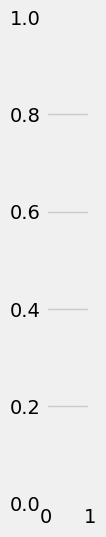

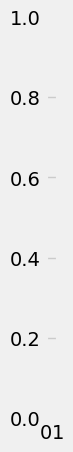

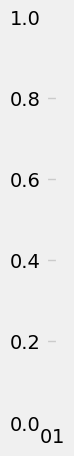

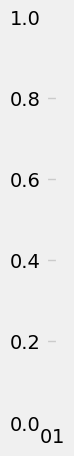

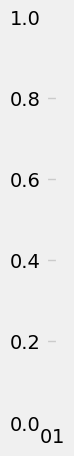

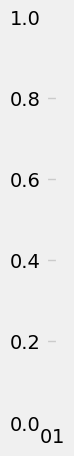

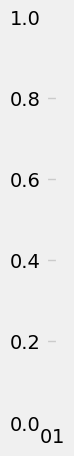

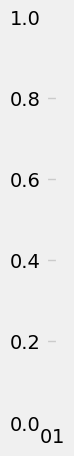

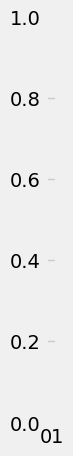

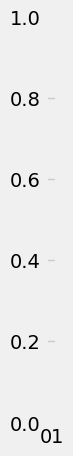

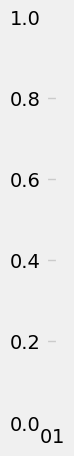

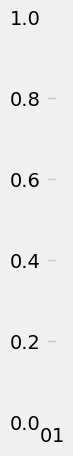

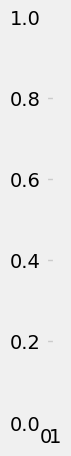

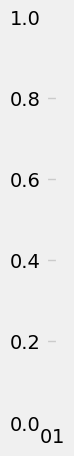

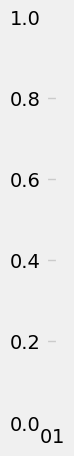

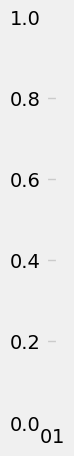

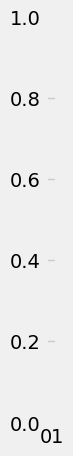

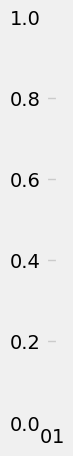

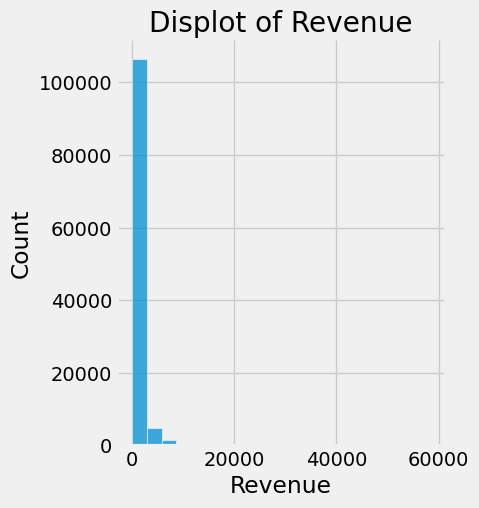

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Date','Day',	'Month',	'Year',	'Customer_Age',	'Age_Group',	'Customer_Gender',	'Country',	'State',
          	'Product_Category',	'Sub_Category',	'Product',	'Order_Quantity',	'Unit_Cost',	'Unit_Price',	'Profit',	'Cost',	'Revenue']:
    n += 1
    plt.subplot(1, 20, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.displot(data[x], bins=20)
    plt.title('Displot of {}'.format(x))
plt.show

#### 3. Thống kê số mẫu dữ liệu theo tuổi

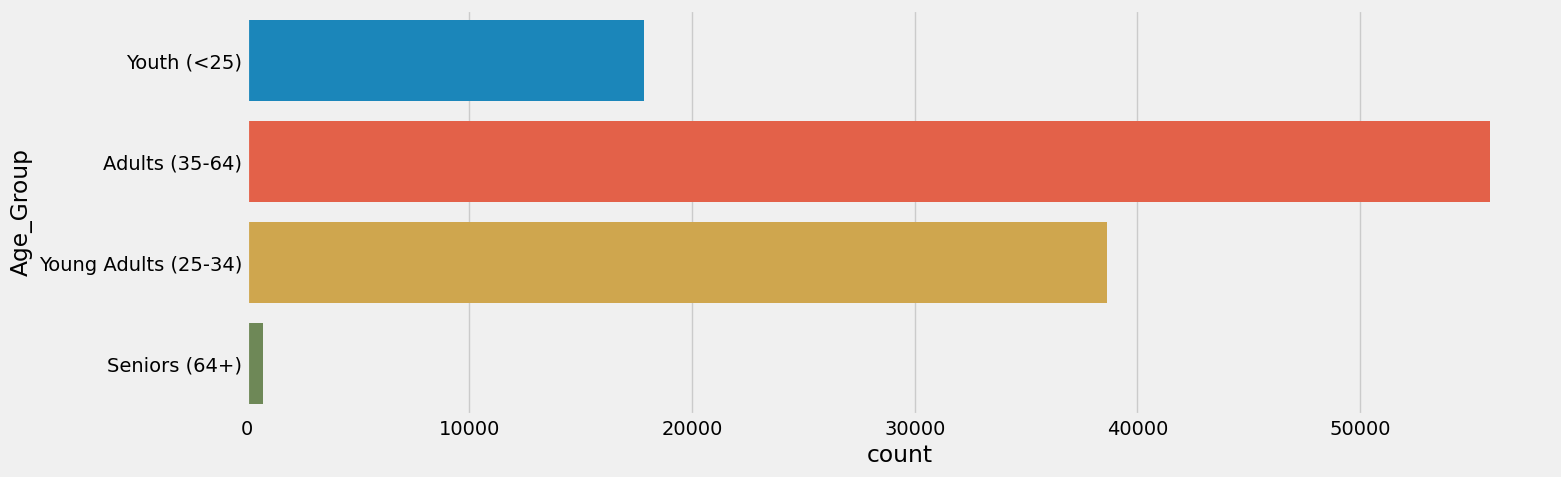

In [9]:
plt.figure(1, figsize=(15,5))
sns.countplot(y = 'Age_Group', data=data)
plt.show()

#### 4. Sử dụng biểu đồ phân tán (Scatter plot) để khảo sát phân bố của thuộc tính Tuổi và  Thu nhập hằng năm theo Giới tính.

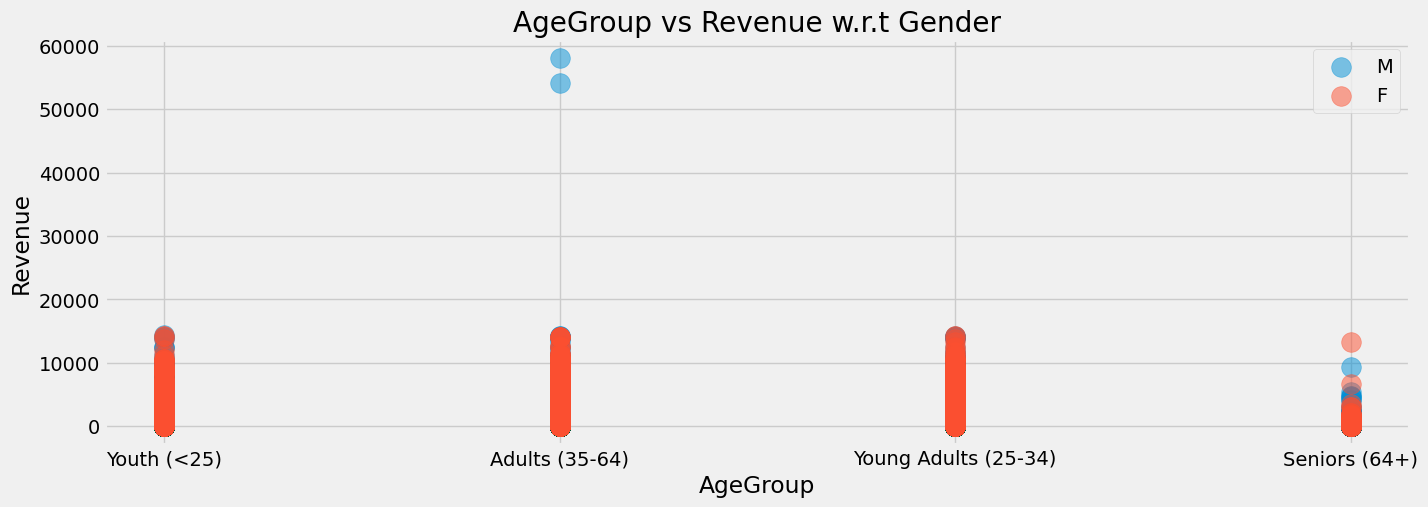

In [10]:
plt.figure(1, figsize=(15,5))
for gender in ['M', 'F']:
    plt.scatter(x = 'Age_Group', y = 'Revenue', data = data[data['Customer_Gender'] == gender],
                s = 200, alpha = 0.5, label = gender)
plt.xlabel('AgeGroup')
plt.ylabel('Revenue')
plt.title('AgeGroup vs Revenue w.r.t Gender')
plt.legend()
plt.show()

#### 6. Sử dụng phương pháp khuỷu tay (ELBOW method) để xác định số cụm cần thiết.


In [11]:
data.select_dtypes(exclude=['int64']).columns
data = pd.get_dummies(data, columns=data.select_dtypes(exclude=['int64']).columns)


In [12]:
print(data.columns)

Index(['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost',
       'Unit_Price', 'Profit', 'Cost', 'Revenue', 'Date_2011-01-01',
       ...
       'Product_Touring-3000 Blue, 62', 'Product_Touring-3000 Yellow, 44',
       'Product_Touring-3000 Yellow, 50', 'Product_Touring-3000 Yellow, 54',
       'Product_Touring-3000 Yellow, 58', 'Product_Touring-3000 Yellow, 62',
       'Product_Water Bottle - 30 oz.', 'Product_Women's Mountain Shorts, L',
       'Product_Women's Mountain Shorts, M',
       'Product_Women's Mountain Shorts, S'],
      dtype='object', length=2120)


c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

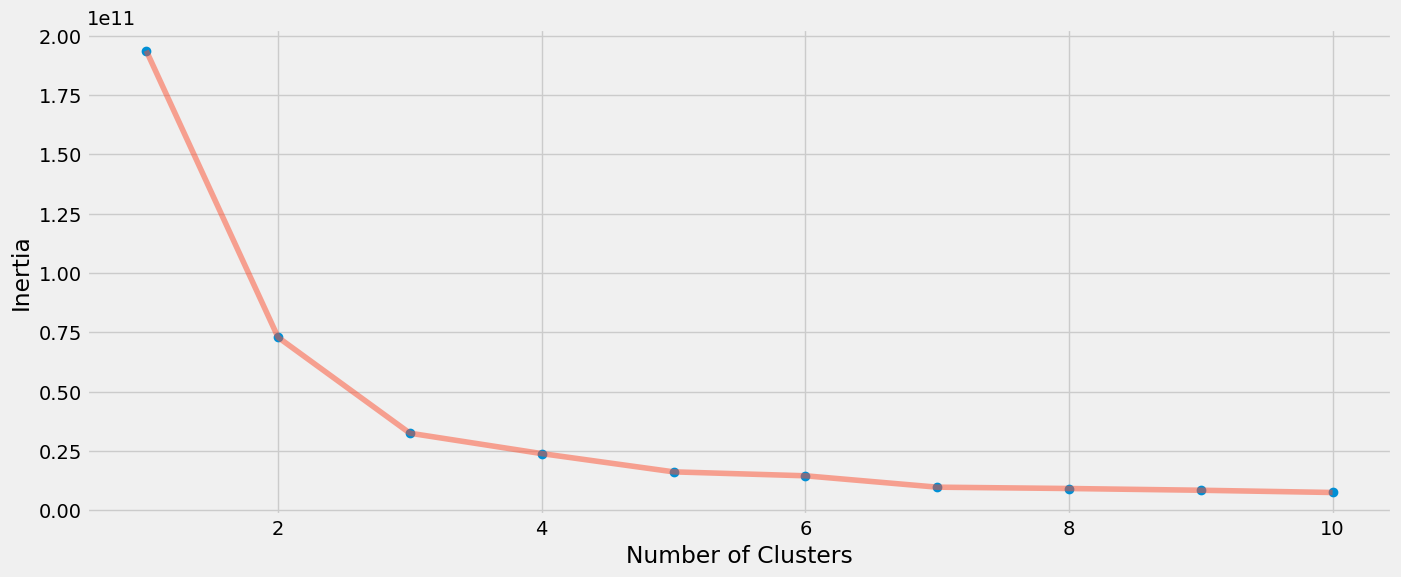

In [13]:
data.select_dtypes(exclude=['int64']).columns
data = pd.get_dummies(data, columns=data.select_dtypes(exclude=['int64']).columns)
X1 = data[['Customer_Age', 'Revenue']].iloc[:,:].values
inertia = []
for n in range (1,11):
    algorithm =  KMeans(n_clusters=n,init ='random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#### Từ biểu đồ trên có thể xác nhận, số cụm tối ưu là 4 (k=4).  Tiến hành gom cụm dữ liệu Tuổi và Số điểm mua sắm

In [14]:
algorithm = KMeans(n_clusters=4, init='random')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 7. Biểu diễn kết quả gom cụm bằng biểu đồ

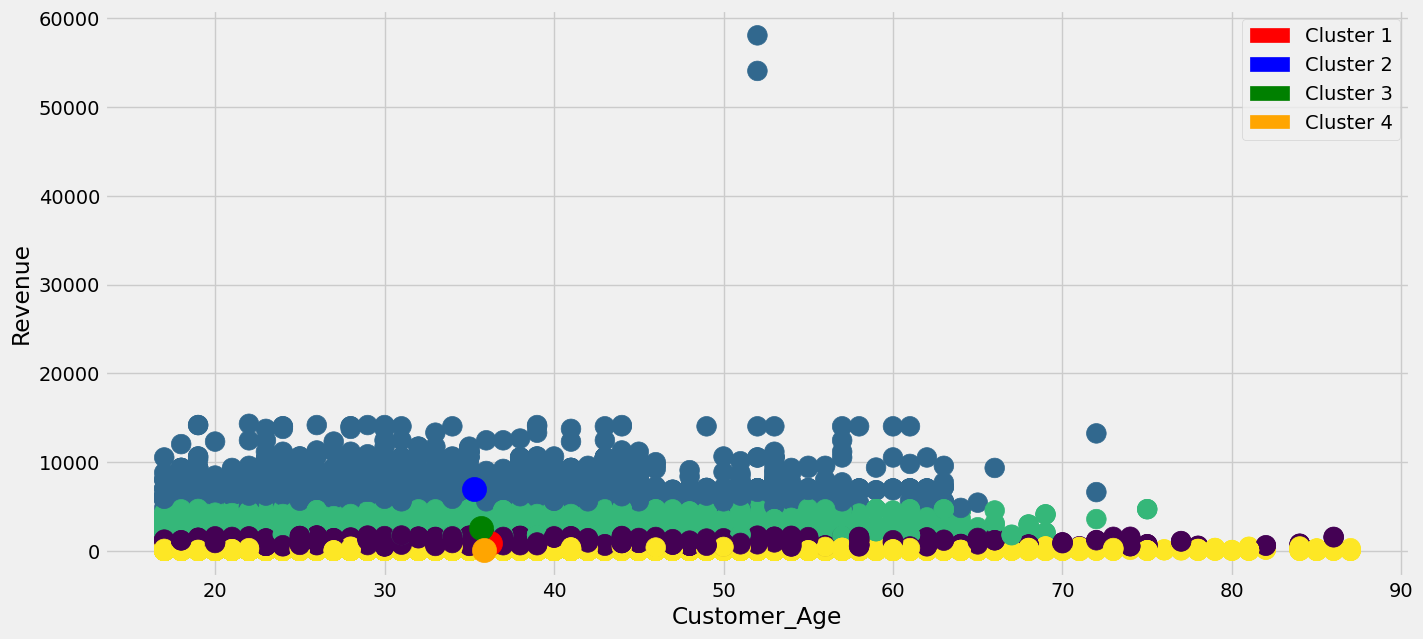

In [24]:

# Màu sắc cho từng trung tâm cụm
colors = ['red', 'blue', 'green', 'orange']  # Có thể thay đổi màu sắc tại đây

plt.figure(1, figsize=(15, 7))
plt.clf()
plt.scatter(x='Customer_Age', y='Revenue', data=data, c=labels1, s=200)
for i in range(4):
    plt.scatter(x=centroids1[i, 0], y=centroids1[i, 1], s=300, c=colors[i], alpha=1)

plt.ylabel('Revenue')
plt.xlabel('Customer_Age')

# Tạo danh sách các Patch hiển thị màu sắc của từng cụm
legend_patches = [mpatches.Patch(color=colors[i], label='Cluster {}'.format(i+1)) for i in range(4)]

# Hiển thị chú thích với các Patch và tên nhãn của từng cụm
plt.legend(handles=legend_patches, loc='upper right')

plt.show()

#### Đánh giá kết quả gom cụm bằng Hệ số Dáng điệu (Silhouette coefficient)
##### Hệ số Dáng điệu đo lường mức độ tách biệt giữa các cụm và sự gần gũi của các điểm dữ liệu bên trong cùng một cụm.
##### - Giá trị của hệ số Dáng điệu nằm trong khoảng [-1, 1]. Các trường hợp phổ biến là:
##### - Giá trị gần 1: Điểm dữ liệu trong cụm tách biệt và được gắn vào cụm chính xác. Đây là một kết quả tốt, cho thấy cụm tách biệt tốt và không có sự chồng chéo giữa các cụm.
##### - Giá trị gần 0: Điểm dữ liệu gần biên cụm hoặc nằm giữa hai cụm. Đây là một kết quả không rõ ràng, có thể cho thấy sự chồng chéo hoặc giao lưu giữa các cụm.
##### - Giá trị gần -1: Điểm dữ liệu được gắn vào cụm sai, và có sự tách biệt tốt với các điểm dữ liệu trong cụm gần nhất. Đây là một kết quả xấu, cho thấy việc gom cụm không hiệu quả và có sự chồng chéo mạnh giữa các cụm.

#### Sử dụng thư viện sklearn để tính hệ số dáng điệu

In [16]:
metrics.silhouette_score(X1, labels1, metric = 'euclidean')

0.673702847325652

#### Giá trị 0.73 cho thấy các điểm dữ liệu trong cụm tách biệt và được gắn vào cụm chính xác. Đây là một kết quả tốt, cho thấy cụm tách biệt tốt và không có sự chồng chéo giữa các cụm